In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings("ignore")

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)


In [28]:

data = pd.read_csv("/home/anshumanj/Downloads/Anshuman/Data_Science/4May/mammographic_masses.data",names =['BI-RADS','Age','Shape','Margin','Density','Severity'],usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')


In [29]:
data.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


1. Data inspection and cleaning 


In [31]:
#Find out the sahpe pf the data
data.shape

(961, 5)

In [32]:
# get the insight of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
Age         956 non-null float64
Shape       930 non-null float64
Margin      913 non-null float64
Density     885 non-null float64
Severity    961 non-null int64
dtypes: float64(4), int64(1)
memory usage: 37.6 KB


In [33]:
data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


Finding the null and Nan values in dataset

In [36]:
data= data.dropna()

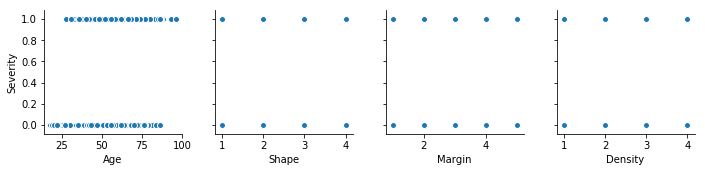

In [37]:
sns.pairplot(data, x_vars=["Age","Shape","Margin","Density"], y_vars="Severity",  aspect=1, kind='scatter')
plt.show()

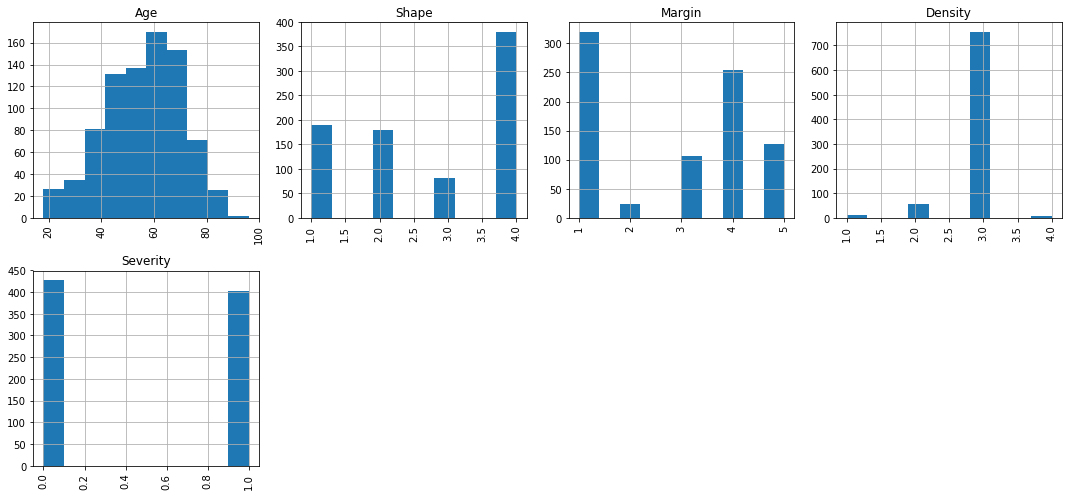

In [56]:
fig = plt.figure(figsize=(15,7))
cols = 4                                                     # num of graph displayed on one line
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
   ax = fig.add_subplot(rows, cols, i + 1)
   ax.set_title(column)
   if data.dtypes[column] == np.object:
       data[column].value_counts().plot(kind="bar", axes=ax)
   else:
       data[column].hist(axes=ax)
       plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)                  # adjust space among graphs
plt.tight_layout() 

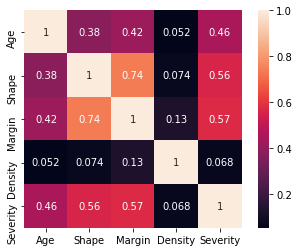

''

In [53]:
sns.heatmap(data.corr(),square=True,annot=True)
plt.show()
plt.tight_layout
;

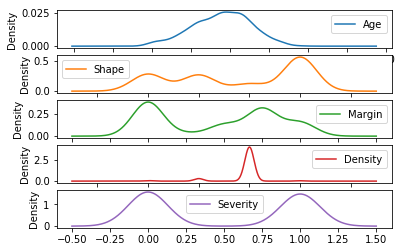

''

<Figure size 432x288 with 0 Axes>

In [102]:
data.plot(kind= ' density ' , subplots=True,  sharex=False)
plt.show()
plt.subplots_adjust(hspace=0.07, wspace= 0.02)   
plt.tight_layout(2)
;


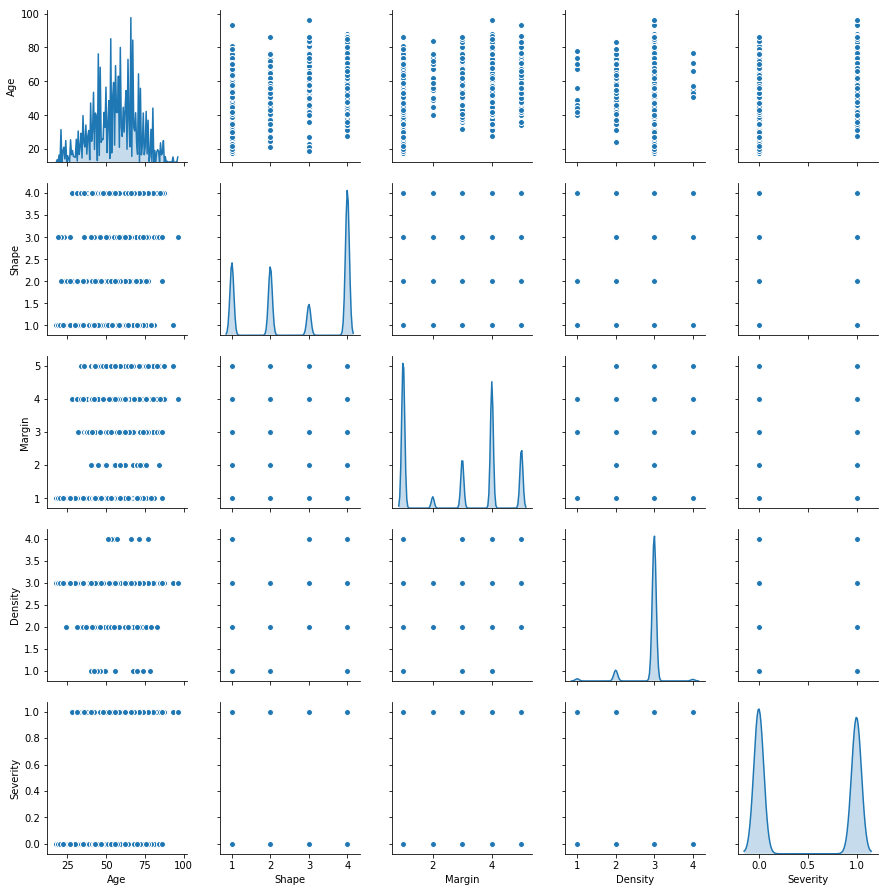

In [112]:
sns.pairplot(data, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )

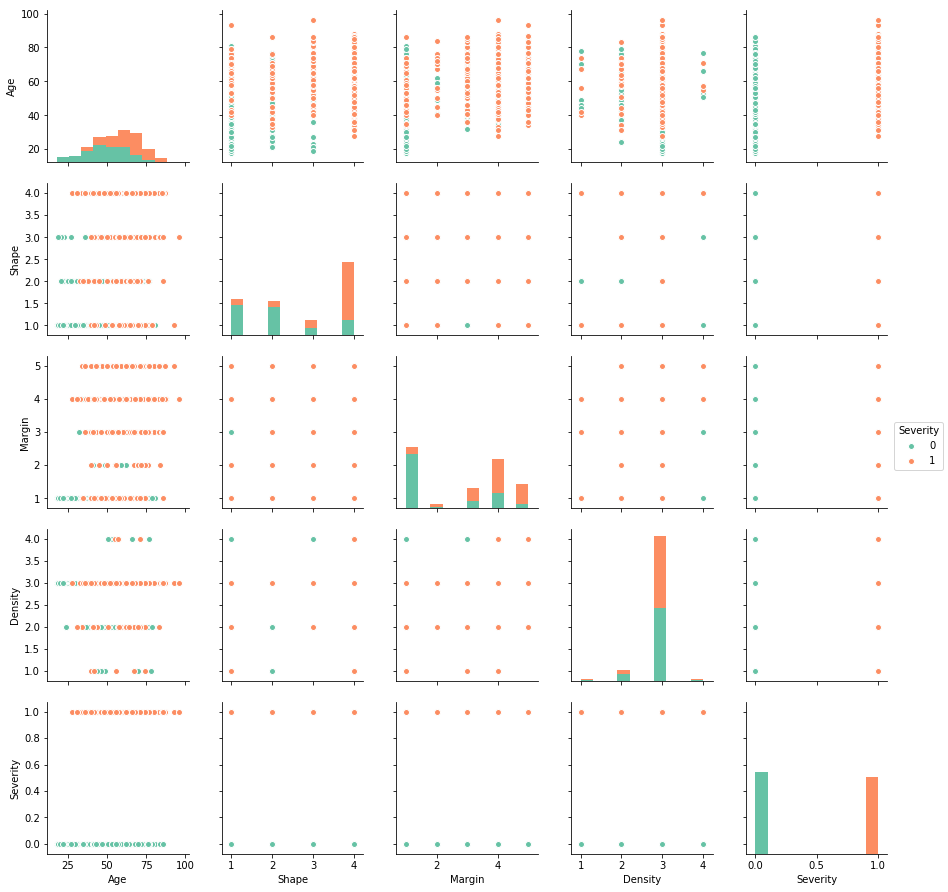

In [111]:
sns.pairplot(data, kind="scatter", hue="Severity",  palette="Set2")
plt.show()

In [113]:
features = list(data.columns[:4])
X = data[features].values
print(X)
labels = list(data.columns[4:])
y = data[labels].values
y = y.ravel()
print(y)

[[67.  3.  5.  3.]
 [58.  4.  5.  3.]
 [28.  1.  1.  3.]
 ...
 [64.  4.  5.  3.]
 [66.  4.  5.  3.]
 [62.  3.  3.  3.]]
[1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 

In [115]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
scaler  = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.76580356  0.17445989  1.39563127  0.24031298]
 [ 0.15166622  0.97988304  1.39563127  0.24031298]
 [-1.89545824 -1.43638642 -1.15892729  0.24031298]
 ...
 [ 0.56109111  0.97988304  1.39563127  0.24031298]
 [ 0.69756608  0.97988304  1.39563127  0.24031298]
 [ 0.42461615  0.17445989  0.11835199  0.24031298]]


In [116]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=0)

In [117]:
clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.75       0.76190476 0.86904762 0.81927711 0.8313253  0.72289157
 0.78313253 0.8313253  0.8902439  0.79268293]
0.805183101744959


In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       134
           1       0.76      0.90      0.82       116

   micro avg       0.82      0.82      0.82       250
   macro avg       0.83      0.83      0.82       250
weighted avg       0.83      0.82      0.82       250



In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print("Confusion Metrix","\n",cf)
print('='*50)

# accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy :",acc)
print('='*50)

# precision
precision = precision_score(y_test, y_pred)
print("precision: ",precision)
print('='*50)

# recall
recall = recall_score(y_test, y_pred)
print("recall:", recall)
print('='*50)

# F-score
f_score = f1_score(y_test, y_pred)
print("f1_score: ",f_score)
print('='*50)

Confusion Metrix 
 [[101  33]
 [ 12 104]]
Accuracy : 0.82
precision:  0.7591240875912408
recall: 0.896551724137931
f1_score:  0.8221343873517786


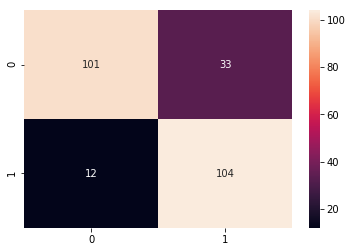

In [153]:
sns.heatmap(cf,annot=True,fmt="d") 

Use GridserachCV for Logistics : 

In [156]:
from sklearn.model_selection import GridSearchCV
# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)



In [157]:
# Create grid search using 5-fold cross validation
clf1 = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [161]:
# Fit grid search
best_model = clf1.fit(X_train, y_train)


In [162]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [172]:
y_pred_acc = best_model.predict(X_test)

In [173]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.816
Precision Score : 0.7536231884057971
Recall Score : 0.896551724137931
F1 Score : 0.8188976377952756


array([[100,  34],
       [ 12, 104]])